<a href="https://colab.research.google.com/github/manarifz/MSc-Project-2-Data-Science/blob/main/P153125_Project_2_Data_Science_LUQMAN_ARIF_ZULKARNAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.0 INTRODUCTION**

For this project, five datasets will be analyzed to extract valuable insights through descriptive statistical methods and visualizations. The datasets include:
1. Population: State-level population data from 1970 to 2024, categorized by sex, age group, and
ethnicity.
2. Basic Amenities: Proportion of households with access to essential amenities, such as electricity,
piped water, and sanitary latrines, by state and district.
3. Profile: Number of households and living quarters by state, spanning from 1970 to 2024.
4. Agriculture: Production and planted areas of crops from 2017 to 2022.
5. Household Income and Expenditure Survey (HIES): Household-level data on income, expenditure,
poverty, and income inequality at the state level, based on the 2022 HIES.

## **1.1 HYPOTHESIS TESTING**
These datasets were sourced from the Department of Statistics Malaysia’s official website (OpenDOSM). For this analysis, the data was filtered to focus on the specified variables across Malaysian states for the year 2022. The objective of this analysis to identify the relationship between poverty with other variables such as population, income, expenditure, and amenities. Therefore a hypothesis was proposed assuming the significant level at 0.05;
- Null Hypothesis (H0) : There is no relationship between poverty with population, income, expenditure,
amenities and agriculture.
- Alternative Hypothesis (H1) : There is a relationship between poverty with population, income, expenditure,
amenities and agriculture.

# **2.0 DATA COLLECTION AND DATA WRANGLING**
Five datasets was retrieved from OpenDOSM websites and aggregated as one dataframe providing all the necessary observations from each variables for further analysis. The data was filtered for 2022 for this analysis.

In [1]:
import pandas as pd
from datetime import datetime

# URLs for the datasets
urls = {
    "population": "https://storage.dosm.gov.my/population/population_state.parquet",
    "amenities": "https://storage.dosm.gov.my/hies/hh_access_amenities.parquet",
    "profile": "https://storage.dosm.gov.my/demography/hh_lq_state.parquet",
    "agriculture": "https://storage.data.gov.my/agriculture/crops_state.parquet",
    "hies": "https://storage.dosm.gov.my/hies/hies_state.parquet",
}

# Load the datasets into a dictionary of DataFrames
dataframes = {name: pd.read_parquet(url) for name, url in urls.items()}

# Convert 'date' column to datetime format
for name, df in dataframes.items():
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])

# Filter data for the year 2022, group by 'state', and calculate the mean for numeric columns
for name, df in dataframes.items():
    if 'date' in df.columns:
        filtered_df = df[df['date'].dt.year == 2022]
        numeric_cols = filtered_df.select_dtypes(include='number')
        dataframes[name] = (
            filtered_df[['state']].join(numeric_cols)
            .groupby('state', as_index=False)
            .mean()
        )

# Perform left joins
merged_df = dataframes['population']
for name in ['amenities', 'profile', 'agriculture', 'hies']:
    merged_df = merged_df.merge(dataframes[name], on='state', how='left')

# Display the result
merged_df.head(20)


,state,population,piped_water,sanitation,electricity,households,living_quarters,planted_area,production,income_mean,income_median,expenditure_mean,gini,poverty
0,Johor,80.765915,98.318182,99.986364,99.963636,1073400.0,1323700.0,11550.466667,1.883132e+07,8517.0,6879.0,5342.0,0.36646,4.6
1,Kedah,43.370677,99.561538,99.993846,99.969231,546900.0,651400.0,25498.855556,1.932412e+05,5550.0,4402.0,3765.0,0.35938,9.0
2,Kelantan,36.703509,72.675000,99.862500,97.516667,376700.0,451900.0,13960.366667,5.264306e+05,4885.0,3614.0,3505.0,0.38540,13.2
3,Melaka,20.219048,100.000000,100.000000,100.000000,285000.0,339600.0,1814.466667,8.226499e+04,8057.0,6210.0,5707.0,0.36963,4.2
4,Negeri Sembilan,24.214787,99.362500,100.000000,99.975000,334000.0,410900.0,1454.233333,3.256617e+05,6788.0,5226.0,4678.0,0.36853,4.4
5,Pahang,32.365163,97.141667,99.065833,99.133333,421700.0,481500.0,8094.077778,1.093536e+07,5777.0,4753.0,4107.0,0.30770,6.3
6,Perak,50.415038,98.876923,100.000000,99.938462,695300.0,840200.0,12673.044444,2.843523e+06,5779.0,4494.0,3903.0,0.36769,7.5
7,Perlis,5.810526,100.000000,100.000000,100.000000,87700.0,75800.0,7173.533333,6.493637e+04,5664.0,4713.0,3834.0,0.33589,4.0
8,Pulau Pinang,34.905013,99.983333,100.000000,99.983333,519900.0,614100.0,3073.111111,2.744381e+04,8267.0,6502.0,5322.0,0.37058,2.0
9,Sabah,68.472932,81.670370,98.614815,97.662963,766600.0,814800.0,11563.733333,7.981459e+05,6171.0,4577.0,3342.0,0.39491,19.7


## **2.1 Data Structures**

Based on the obtained results, the dataframes consist of 16 rows observation referring to the states in Malaysia and 14 columns variables referring to states, population, piped_water, sanitation, electricity, households, living_quarters, planted_area, production, income_mean, income_median and expenditure_mean, gini and poverty.

In [2]:
#structures of the dataframes
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             16 non-null     object 
 1   population        16 non-null     float64
 2   piped_water       16 non-null     float64
 3   sanitation        16 non-null     float64
 4   electricity       16 non-null     float64
 5   households        16 non-null     float64
 6   living_quarters   16 non-null     float64
 7   planted_area      15 non-null     float64
 8   production        15 non-null     float64
 9   income_mean       16 non-null     float64
 10  income_median     16 non-null     float64
 11  expenditure_mean  16 non-null     float64
 12  gini              16 non-null     float64
 13  poverty           16 non-null     float64
dtypes: float64(13), object(1)
memory usage: 1.9+ KB
None


In [3]:
#Identifying number of rows and columns in dataframe
print('The number of rows and columns in dataframe:', merged_df.shape)

The number of rows and columns in dataframe: (16, 14)


## **2.2 MISSING VALUES IN DATA**
It was revealed that the dataframes for planted_area and production contained two missing values, both associated with the state of W.P. Putrajaya. W.P. Putrajaya is primarily an urban area with minimal agricultural activity. The Agriculture Heritage Park (Taman Warisan Pertanian) in Precinct 16 showcases Malaysia's agricultural history, featuring various crops and demonstrations. (Putrajaya Corporation).

However, this park serves more as an educational and tourist attraction rather than a center for active agricultural production. Consequently, the absence of agricultural data for W.P. Putrajaya in datasets like planted_area and production is likely due to the region's urban focus and limited agricultural activities.

 As a result, data collection for these variables might not have been prioritized or applicable to this region, further justifying the absence of values.

**References:**

Putrajaya Corporation. (n.d.). *Taman Warisan Pertanian*. Retrieved January 20, 2025, from https://www.ppj.gov.my/en/page/taman-warisan-pertanian-1?slug=eko-pelancongan

In [4]:
#Identifying total number of missing values in each columns
merged_df.isnull().sum()

,0
state,0
population,0
piped_water,0
sanitation,0
electricity,0
households,0
living_quarters,0
planted_area,1
production,1
income_mean,0


## **2.3 STATISTICAL SUMMARY OF DATA**

In [5]:
#statistical summary of the data
merged_df.describe()

,population,piped_water,sanitation,electricity,households,living_quarters,planted_area,production,income_mean,income_median,expenditure_mean,gini,poverty
count,16.000000,16.000000,16.000000,16.000000,1.600000e+01,1.600000e+01,15.000000,1.500000e+01,16.00000,16.000000,16.000000,16.000000,16.000000
mean,40.974718,95.185557,99.842756,99.294077,5.414125e+05,6.326938e+05,8526.851111,2.683868e+06,7902.56250,6212.687500,4992.625000,0.358949,6.087500
std,34.618683,9.156463,0.401321,1.465649,4.693525e+05,5.444949e+05,7539.480491,5.368863e+06,2772.21685,2141.864506,1609.960533,0.027282,5.099395
min,1.940852,72.675000,98.614815,94.729268,2.530000e+04,2.360000e+04,0.933333,1.064901e+04,4885.00000,3614.000000,3342.000000,0.300280,0.100000
25%,22.899123,98.024053,99.982456,99.658333,2.952000e+05,3.376250e+05,2443.788889,7.360068e+04,5778.50000,4679.000000,3885.750000,0.353507,2.375000
50%,35.804261,99.462019,100.000000,99.972115,4.708000e+05,5.478000e+05,7173.533333,1.932412e+05,7018.00000,5552.000000,4427.000000,0.367745,4.500000
75%,49.799436,100.000000,100.000000,100.000000,6.513500e+05,8.164750e+05,12118.388889,1.820834e+06,8329.50000,6885.250000,5433.250000,0.372835,7.875000
max,141.357644,100.000000,100.000000,100.000000,1.952800e+06,2.227500e+06,25498.855556,1.883132e+07,13473.00000,10234.000000,8897.000000,0.394910,19.700000


## **Statistical Description of The Data**

The statistical summary for Malaysia across states in 2022 can be referenced from the Department of Statistics Malaysia's Household Income Survey Report 2022.

Based on the statistical summary obtained for Malaysia across state in 2022, the population ranges from a minimum of 1.941 to a maximum of 141.358 thousand, with a median of 35.804 thousand. The mean value of 40.975 suggests a slight right skew, meaning some areas might have significantly higher populations.

In terms of amenities, the access to piped water ranges between 72.67% and 100%, with a high median of 99.46%, indicating that most areas have reliable water supply. Meanwhile, the sanitation access is even higher, ranging from 98.61% to 100%, with a median and mean very close to 100%. The electricity availability shows similar trends, with values between 94.73% and 100%, a median
of 99.97%, and a mean of 99.29%. These metrics reflect excellent infrastructure coverage overall.

The number of households and living quarters demonstrates significant variation. The households range from 25,300 to 1,952,800, with a median of 470,800. Whereas the living quarters range from 23,600 to 2,227,500, with a median of 547,800. These variables suggest a mix of densely and sparsely populated areas.

In the context of agricultural sector, the planted area ranges from 0.933 hectares to 25,498.856 hectares, with a median of 7,173.533 hectares. The large range indicates diversity in agricultural land use. Agricultural production spans from 10,649 tonnes to a massive 18,831,317 tonnes, with a median of 193,241 tonnes. Such variability likely reflects differences in agricultural productivity across regions.

In terms income and expenditure in Malaysia the average income ranges from RM4,885 to RM13,473, with a median of RM7,018. The income median ranges from RM3,641 to RM10,234, with a median of RM5,552. The differences between mean and median incomes suggest income inequality in some areas. The average expenditure in Malaysia ranges from RM3,342 to RM8,897 with a median of RM4,427.

As for poverty rate and gini coefficient, the poverty rate values ranges from 19.7 to 0.1, with a median of 4.5. The gini coefficient ranges from 0.3003 to 0.3949, with a median of 0.3677. These values suggest moderate income inequality in the dataset.

**References:**

Department of Statistics Malaysia. (2023, July 28). *Household Income Survey Report 2022 (Malaysia & States).* Retrieved on 20th January 2025, from https://www.dosm.gov.my/portal-main/release-content/household-income-survey-report--malaysia--states

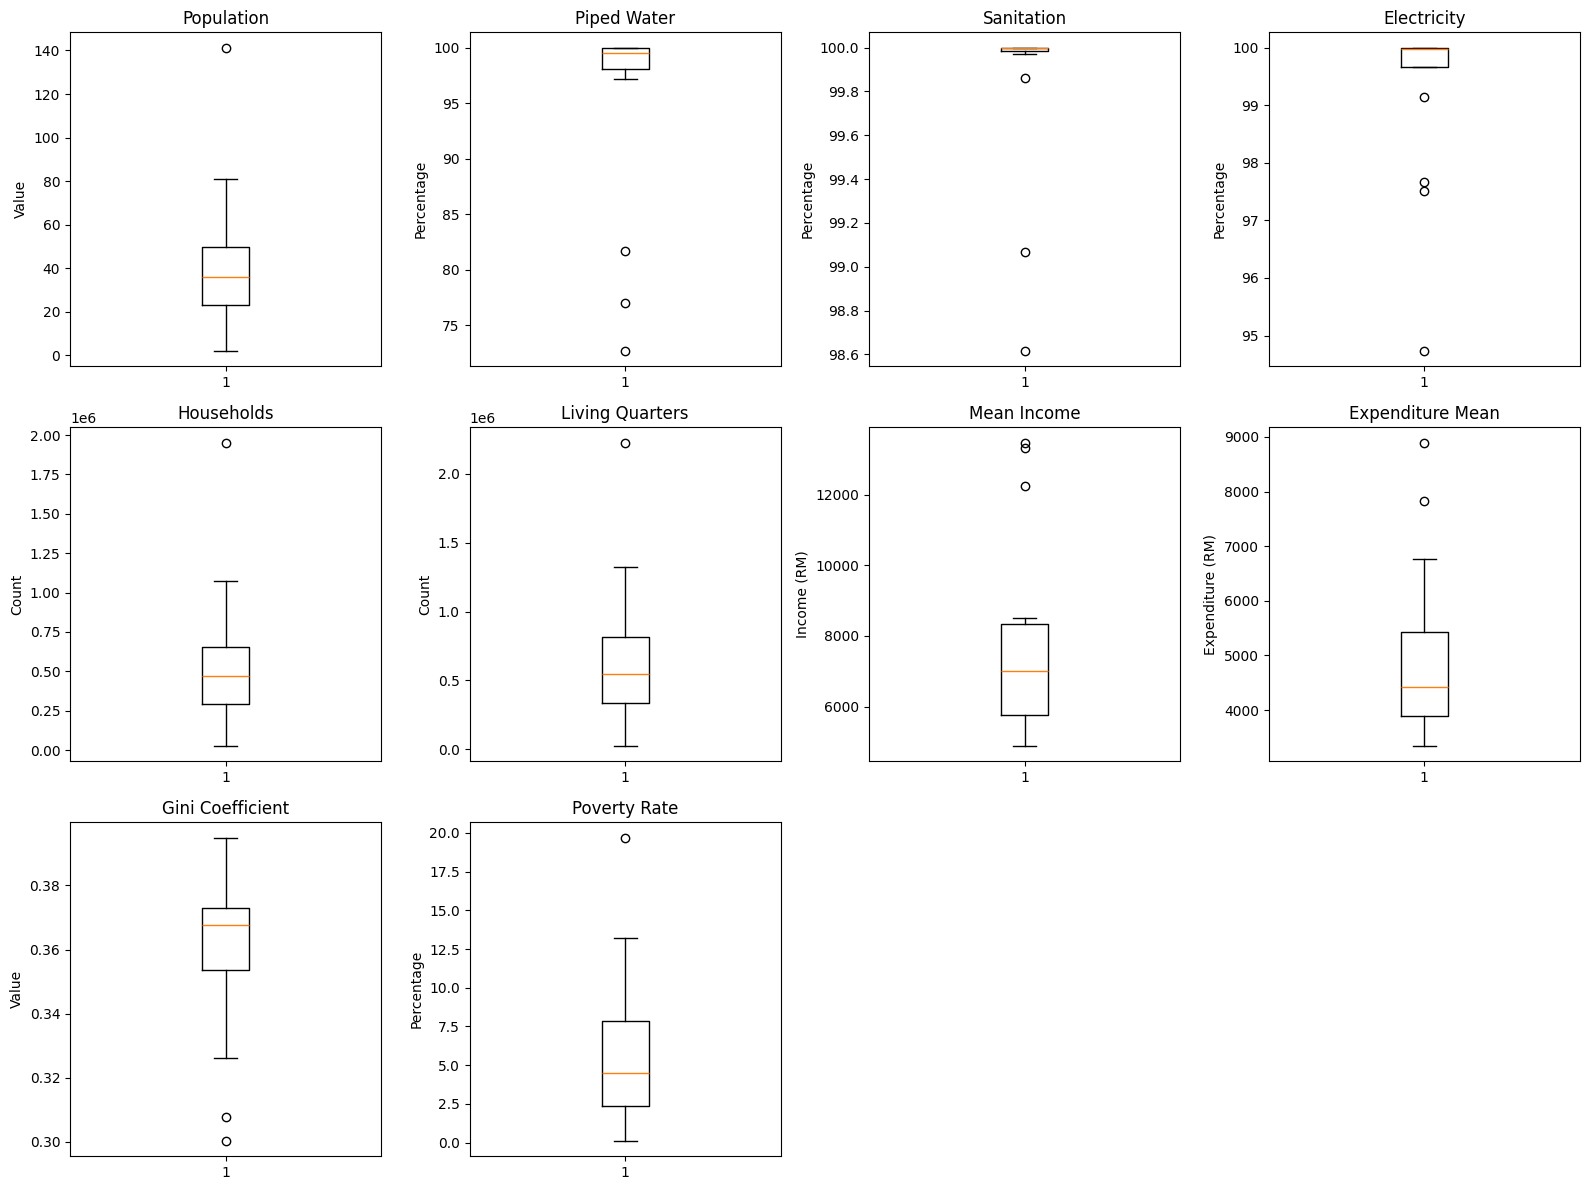

In [6]:
import matplotlib.pyplot as plt

# Create subplots (3 rows, 4 columns)
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()  # Flatten to make indexing easier

# Column names and titles
titles = [
    "Population", "Piped Water", "Sanitation", "Electricity",
    "Households", "Living Quarters","Mean Income", "Expenditure Mean",
    "Gini Coefficient", "Poverty Rate"
]
y_labels = [
    "Value", "Percentage", "Percentage", "Percentage",
    "Count", "Count", "Income (RM)", "Expenditure (RM)",
    "Value", "Percentage"
]

# Define the columns to be used for the boxplots
# Assuming these are the desired columns from merged_df
columns = [
    "population", "piped_water", "sanitation", "electricity",
    "households", "living_quarters", "income_mean", "expenditure_mean",
    "gini", "poverty"
]

# Plot each boxplot
for i, (col, title, y_label) in enumerate(zip(columns, titles, y_labels)):
    axes[i].boxplot(merged_df[col])
    axes[i].set_title(title)
    axes[i].set_ylabel(y_label)

# Hide any unused subplots (if the grid has extra slots)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

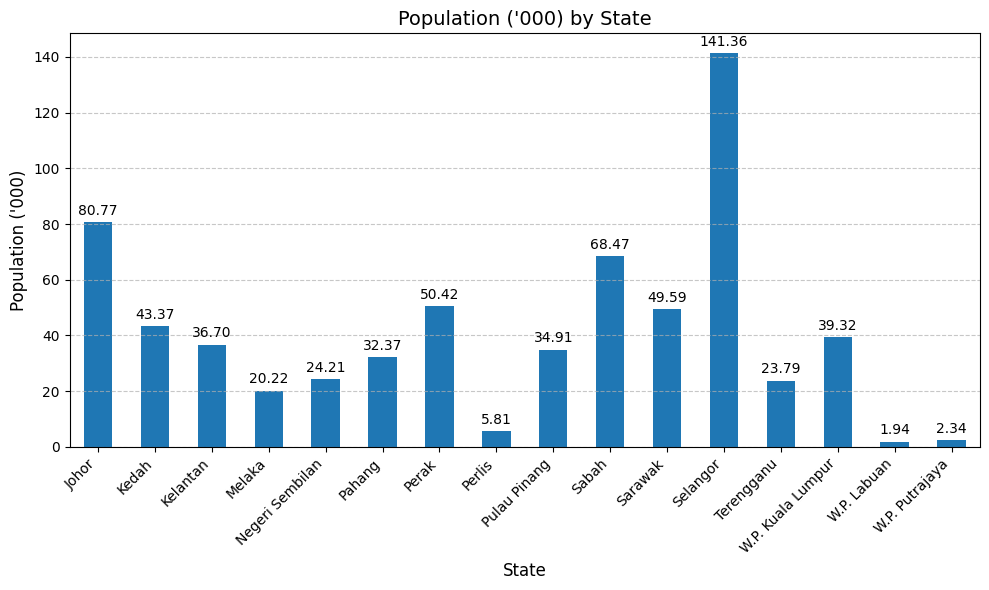

In [7]:
import matplotlib.pyplot as plt

# Filter the necessary columns
merged_df_2 = merged_df[["state","population", "piped_water", "sanitation", "electricity",
                         "households", "living_quarters", "planted_area", "production",
                         "income_mean", "expenditure_mean", "gini", "poverty"]]

# Group by year and sum the specified columns
grouped_data = merged_df_2.groupby('state')['population'].sum()

# Plot the grouped data
ax = grouped_data.plot(kind='bar', title='Population by State', figsize=(10, 6))

# Add observation values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Customize plot
plt.title("Population ('000) by State", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Population ('000)", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Population Across States In Malaysia 2022**

Based on the figure above, Selangor has the highest population (141,360) among other states in Malaysia. In year 2022, the three states with the highest population including Selangor, Johor and Sabah which is at 21.6%, 12.3% and 10.4% respectively (Department of Statistics Malaysia, 2023).

This can be attributed to Selangor’s status as a main port of entry and has the biggest economy in the country, its enormous population can be explained (Invest Selangor Berhad).

The state is known for its strong economic growth, driven by abundant natural resources, first-rate air, sea, and land connectivity, and unparalleled urban commercialization (Invest Selangor Berhad).

It also provides a wide range of investment options. These elements work together to create a sophisticated business environment that draws in companies and job seekers (Invest Selangor Berhad).

**References:**

Department of Statistics Malaysia. (2023). *Current population estimates, Malaysia, 2022*. Retrieved January 20, 2025, from https://www.dosm.gov.my/portal-main/release-content/current-population-estimates-malaysia-2022

Invest Selangor Berhad. (n.d.). *Why Selangor?*. Retrieved January 20, 2025, from https://www.investselangor.my/Why-Selangor/

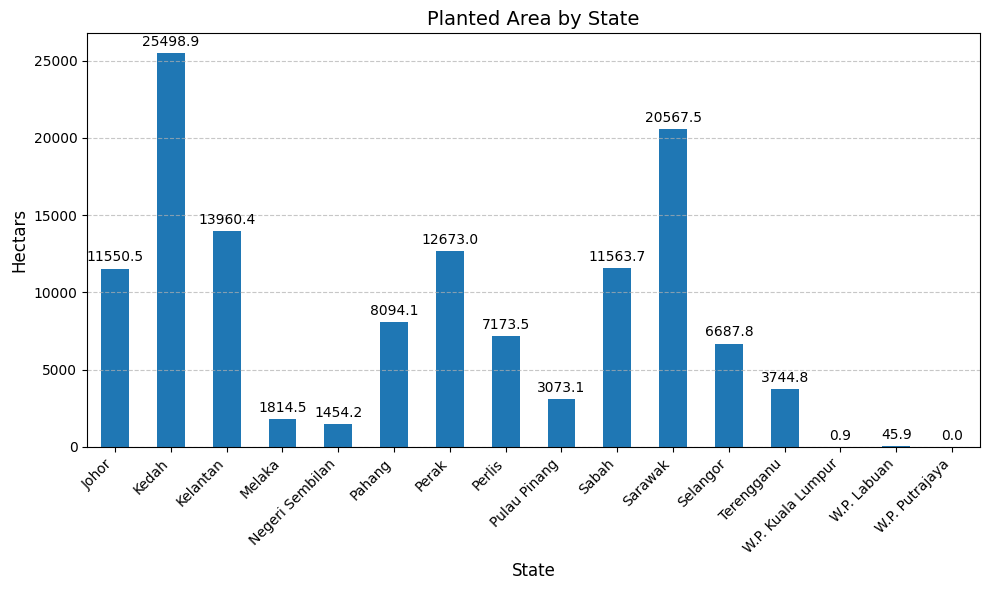

In [8]:
# Group by year and sum the specified columns
grouped_data = merged_df_2.groupby('state')['planted_area'].sum()

# Plot the grouped data
ax = grouped_data.plot(kind='bar', title='Planted Area by State', figsize=(10, 6))

# Add observation values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

# Customize plot
plt.title("Planted Area by State", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Hectars", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Planted Area Across States In Malaysia 2022**

In terms of planted area in Malaysia, Kedah stands out as the state with the largest planted area, covering with average of 25,498.86 hectars (Department of Statistics Malaysia, 2022).


This significant area highlights Kedah’s crucial contribution to the country's agriculture, especially in the field of rice farming, for which it has long been referred to as Malaysia's "Rice Bowl" (Tourism Malaysia, 2008).

The state dominates the nation in terms of planted area because of its vast amount of fertile land and comfortable climate, which make it a perfect place for large-scale farming. This sizable cultivated area further emphasizes Kedah's significance for maintaining agricultural output nationally and guaranteeing food security.

**References:**

Department of Statistics Malaysia. (2022). *Other crops 2018 2019 2020 2021 2022.* Retrieved January 20, 2025, from https://www.dosm.gov.my/portal-main/release-document-log?release_document_id=6600

Tourism Malaysia. (2008). *Visit Kedah Year 2008.* Retrieved January 20, 2025, from https://www.tourism.gov.my/media/view/visit-kedah-year-2008-1


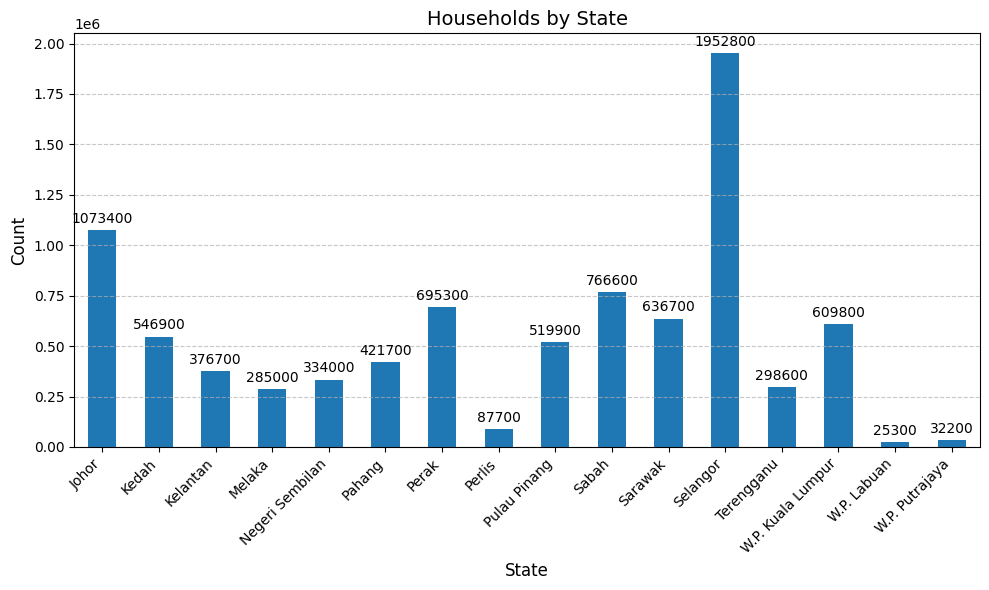

In [9]:
# Group by year and sum the specified columns
grouped_data = merged_df_2.groupby('state')['households'].sum()

# Plot the grouped data
ax = grouped_data.plot(kind='bar', title='Households by State', figsize=(10, 6))

# Add observation values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Customize plot
plt.title("Households by State", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Number of Households Across States In Malaysia 2022**

Regarding households, the findings constantly showed that, in comparison to other states, Selangor has the most households (Amirudin Shari, 2023).

The main cause of this is Selangor's status as an economic powerhouse, which draws a sizable labor force and promotes population expansion. Housing demand rises as a result of the state's urbanization and variety of job options (Invest Selangor Berhad).

The larger number of households is also a result of Selangor's well-established infrastructure, easy access to necessary services, and advantageous location close to the federal capital, which attracts both individuals and families.

**References:**

Invest Selangor Berhad. (n.d.). *Why Selangor?* Retrieved January 20, 2025, from https://www.investselangor.my/why-selangor/

Amirudin Shari. (2023, July 9). *MB says Selangor can better 2022's record GDP contribution.* Retrieved January 20, 2025, from https://www.amirudinshari.com/posts/selangor-journal-nothings-impossible-mb-says-selangor-can-better-2022s-record-gdp-contribution


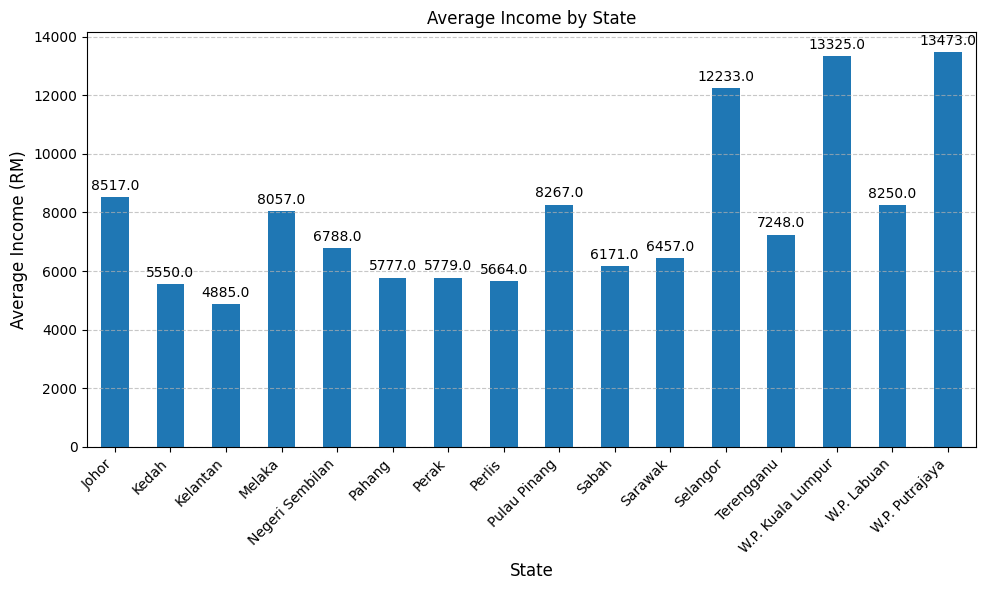

In [10]:
# Group by year and sum the specified columns
grouped_data = merged_df.groupby('state')['income_mean'].sum()

# Plot the grouped data
ax = grouped_data.plot(kind='bar', title='Average Income by State', figsize=(10, 6))

# Add observation values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

# Customize plot
#plt.title("Average Income by State", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Average Income (RM)", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Average Income Across State**

In the context of the average income in Malaysia in year 2022, it can be demonstrated that W.P. Kuala Lumpur, W.P. Putrajaya, and Selangor recorded the highest average incomes, amounting to RM13,325, RM13,473, and RM12,233, respectively (Department of Statistics Malaysia, 2022).

This is due to the highly dense in economic activities, including finance, professional services and technology in these urban and developed areas. These regions also benefit from a higher cost of living, which is often correlated with better-paying job opportunities (Invest Selangor Berhad).

In contrast, Kelantan has showed the lowest average income at RM4,885 (Department of Statistics Malaysia, 2022), which is caused by predominantly rural economy, reliance on agriculture, limited industrial and commercial development (AHK Malaysia, 2022).

The lower level of economic diversification and investment in Kelantan contributes to fewer high-paying job opportunities, resulting in a significantly lower average income compared to more developed states.

References

Department of Statistics Malaysia. (2022). *Household Income by State.* Retrieved January 20, 2025, from https://open.dosm.gov.my/dashboard/household-income-expenditure


Invest Selangor Berhad. (n.d.). *Why Selangor?.* Retrieved January 20, 2025, from https://www.investselangor.my/why-selangor/

AHK Malaysia. (2022). *Kelantan*. Retrieved January 20, 2025, from https://malaysia.ahk.de/en/why-malaysia/general-economic-information/kelantan

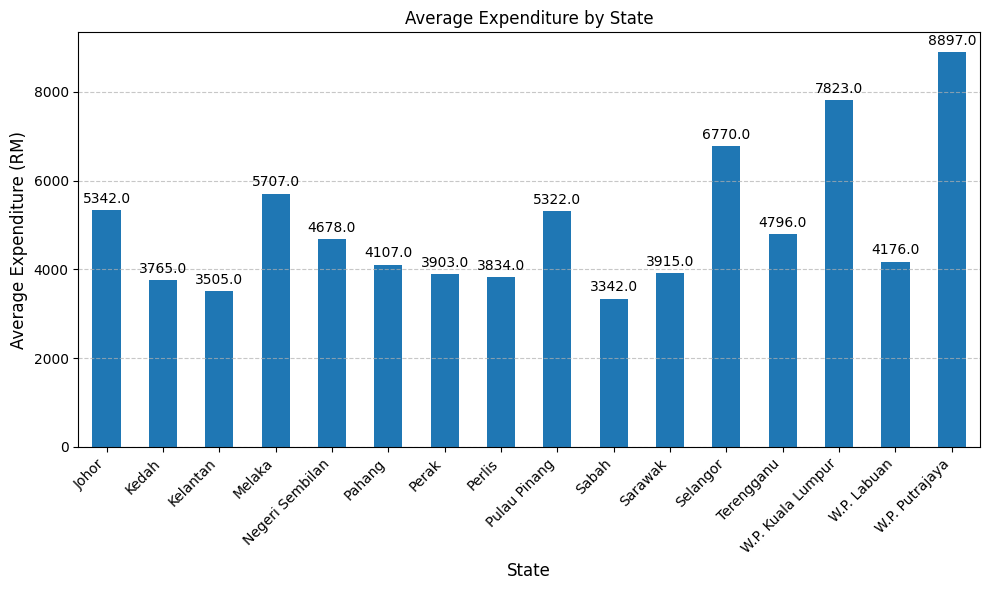

In [11]:
# Group by year and sum the specified columns
grouped_data = merged_df.groupby('state')['expenditure_mean'].sum()

# Plot the grouped data
ax = grouped_data.plot(kind='bar', title='Average Expenditure by State', figsize=(10, 6))

# Add observation values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

# Customize plot
#plt.title("Average Income by State", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Average Expenditure (RM)", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

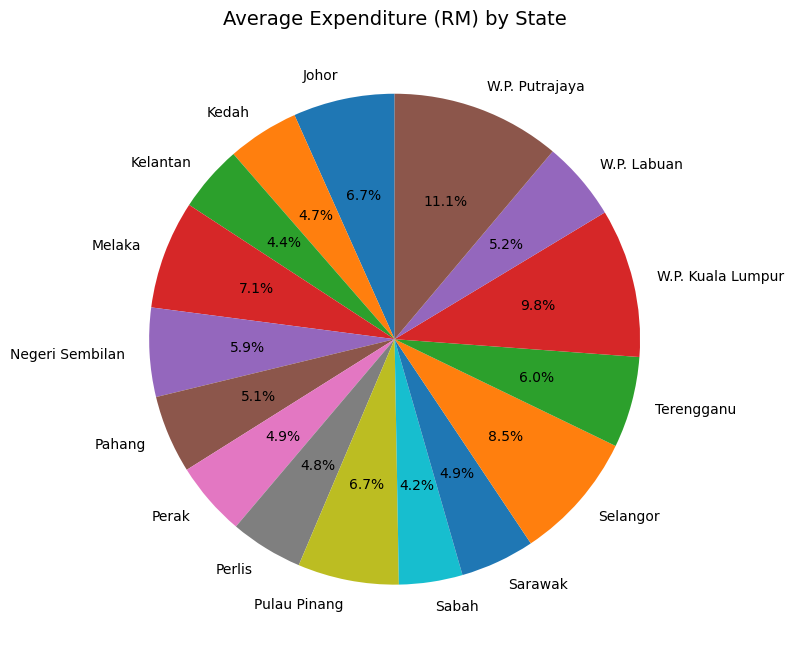

In [12]:
grouped_data = merged_df.groupby('state')['expenditure_mean'].sum()

# Prepare data for the pie chart
labels = grouped_data.index  # State names
values = grouped_data.values  # Expenditure values

# Plot the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    autopct='%.1f%%',  # Display percentages
    startangle=90,  # Start the pie chart at the top
    textprops={'fontsize': 10},  # Font size for labels
    colors=plt.cm.tab10.colors  # Use a colormap for colors
)

# Customize the chart
plt.title("Average Expenditure (RM) by State", fontsize=14)
plt.tight_layout()

# Show the pie chart
plt.show()

## **Average Expenditure Across State**

In terms of average expenditure in Malaysia, W.P. Putrajaya recorded the highest average expenditure at 11.1 % (RM8,897), while Sabah had the lowest at 4.2% (RM3,342) (Statista, 2022).

Because W.P. Putrajaya is known for its status as  administrative capital and its citizens work in high-skilled industries and the government, they frequently have more disposable money, which accounts for the city's high spending.


The expense of housing, access to first-rate services, and urban amenities all contribute to Putrajaya's high cost of living.

On the other hand, Sabah's primarily rural and agrarian economy, where people often have smaller disposable incomes, is reflected in its lower average expenditure (Bernama, 2023).

The state's lower average expenditure when compared to more developed regions of Malaysia is a result of a number of factors, including limited access to metropolitan facilities, lower consumer purchasing power, and a focus on subsistence-based lifestyles.

References:

Statista. (2022). *Average monthly consumption expenditure in Malaysia in 2022, by state.* Retrieved January 20, 2025, from https://www.statista.com/statistics/1133186/malaysia-average-monthly-consumption-expenditure-by-state/

Bernama. (2023, July 9). *Insights Into Sabah's Rural And Interior Poverty.* Retrieved January 20, 2025, from https://www.bernama.com/en/news.php?id=2364927


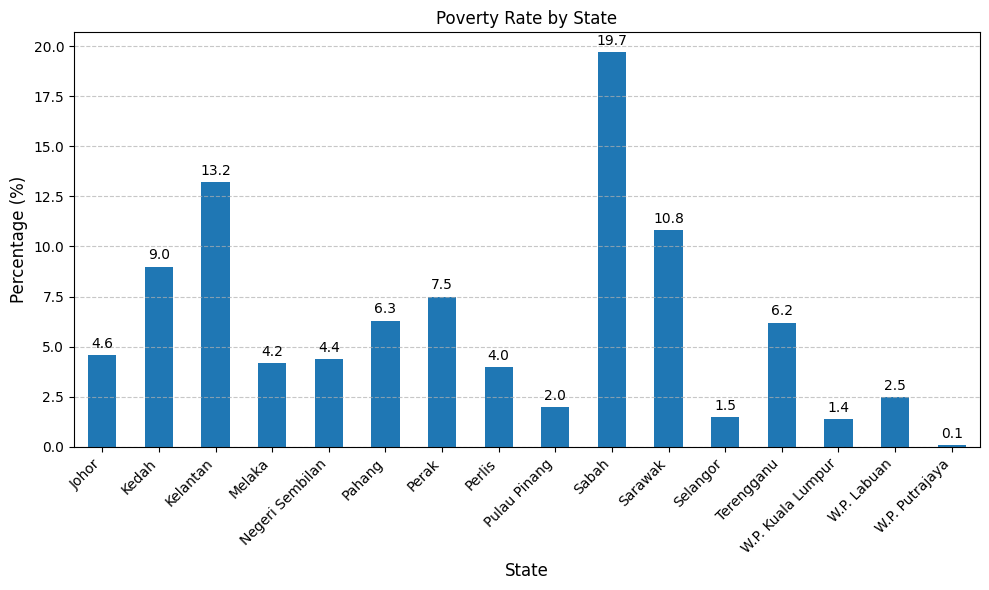

In [13]:
# Group by year and sum the specified columns
grouped_data = merged_df.groupby('state')['poverty'].sum()

# Plot the grouped data
ax = grouped_data.plot(kind='bar', title='Poverty Rate by State', figsize=(10, 6))

# Add observation values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

# Customize plot
#plt.title("Average Income by State", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Poverty Rate Across State in Malaysia**

In terms of poverty rate, the figure above has demonstrated that Sabah has the highest poverty rate (19.7%), followed by Kelantan (13.2%) among all states in Malaysia (Department of Statistics Malaysia, 2022).

This is mostly because these states are dealing with a number of socioeconomic issues. Due to its remote location and predominately rural population, Sabah encounter challenges with infrastructure, education and healthcare which adversely affects the economic growth and employment prospects to be delayed (The Malaysian Insight, 2023; The Asia Foundation, 2023).

Comparably, Kelantan's emphasis on agriculture, lack of industrialization, and low levels of private sector investment place it under economic pressure (AHK Malaysia, 2022). The increased poverty rates in both states are further exacerbated by difficulties in resolving income inequality and guaranteeing fair resource distribution (The Edge Malaysia, 2022).

References:

Department of Statistics Malaysia. (2022). *Poverty by State*. Retrieved January 20, 2025, from https://open.dosm.gov.my/data-catalogue/hh_poverty_state

The Malaysian Insight. (2023, July 9). *Sabah struggles to break free from economic 'doom loop'*. Retrieved January 20, 2025, from https://www.themalaysianinsight.com/s/484917

The Asia Foundation. (2023, April 21). *Towards a Community-based Green Economy in Sabah.* Retrieved January 20, 2025, from https://asiafoundation.org/publication/towards-a-community-based-green-economy-in-sabah/

AHK Malaysia. (2022). *Economic overview of Kelantan. Malaysia External Trade Development Corporation.* Retrieved January 20, 2025, from https://malaysia.ahk.de/en/why-malaysia/general-economic-information/kelantan

The Edge Malaysia. (2022). *Kelantan's economic challenges and poverty rates. The Edge Malaysia.* Retrieved January 20, 2025, from https://theedgemalaysia.com/node/678039

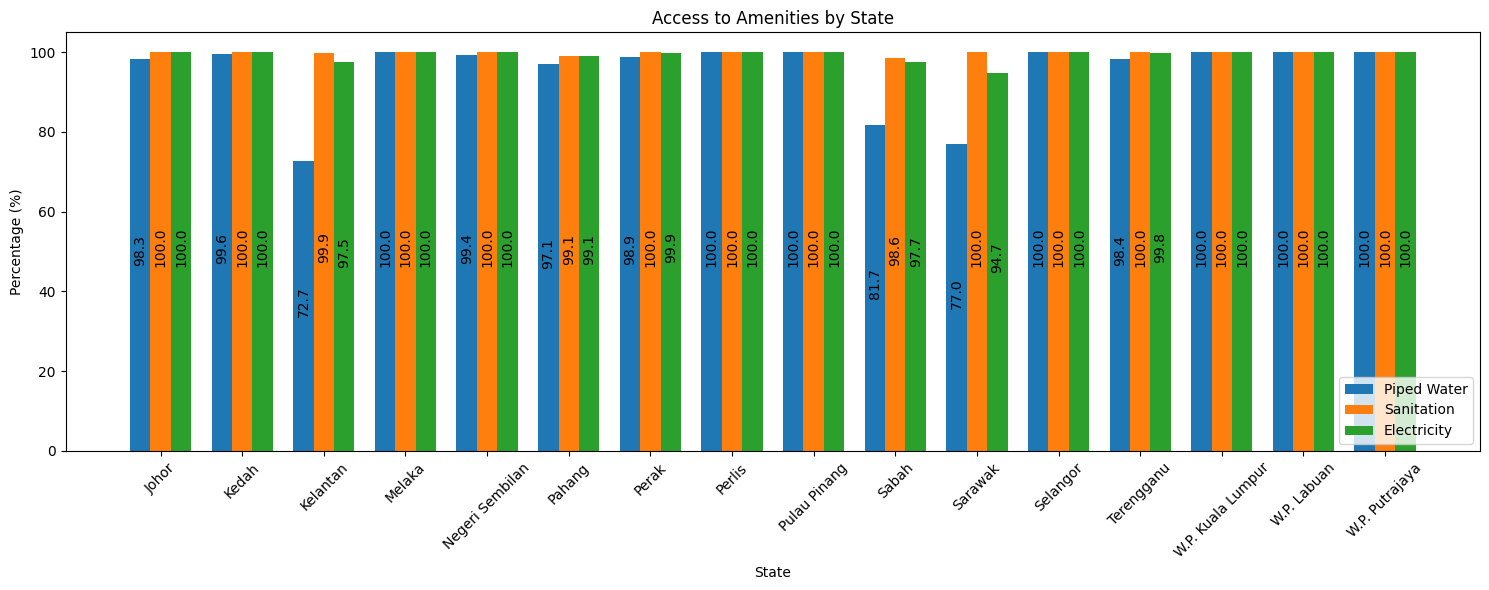

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the necessary columns
columns_to_plot = ["piped_water", "sanitation", "electricity"]
merged_df_2 = merged_df[["state"] + columns_to_plot]

# Group by state and sum the values for the columns
grouped_data = merged_df_2.groupby('state')[columns_to_plot].sum()

# Get the state names for the x-axis
states = grouped_data.index

# Get the data for each column
piped_water = grouped_data["piped_water"].values
sanitation = grouped_data["sanitation"].values
electricity = grouped_data["electricity"].values

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(states))


# Create the bar plot
fig, ax = plt.subplots(figsize=(15, 6))  # Adjust figsize as needed
ax.bar(x_pos - bar_width, piped_water, bar_width, label="Piped Water")
ax.bar(x_pos, sanitation, bar_width, label="Sanitation")
ax.bar(x_pos + bar_width, electricity, bar_width, label="Electricity")

# Add observation values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center', padding=3, rotation=90)

# Customize the plot
ax.set_title("Access to Amenities by State", fontsize=12)
ax.set_xlabel("State", fontsize=10)
ax.set_ylabel("Percentage (%)", fontsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(states, rotation=45)  # Rotate x-axis labels for better readability
ax.legend(loc="lower right")  # Add a legend
plt.tight_layout()
plt.show()

## **Basic Access to Amenities Across States In Malaysia**

In terms of access to piped water in Malaysia, Kelantan has the lowest rate at 72.67%, followed by Sabah at 81.67% and Sarawak at 76.96% (Department of Statistics Malaysia, 2022). This disparity highlights the significant regional challenges in providing reliable infrastructure across the country.

Due to its rural setting, topography, and past underinvestment in water delivery systems, Kelantan has a lower rate (The Sun, 2022).Despite having higher access rates, Sabah and Sarawak still confront logistical challenges because of their large and isolated regions (The Sun, 2022).These numbers demonstrate how these states continue to require focused infrastructure development in order to increase access to basic facilities and lessen living standard discrepancies (Economic Planning Unit, 2020).

According to the data, all states in Malaysia typically have enough coverage for both electricity and sanitation (Department of Statistics Malaysia, 2022).To properly understand the differences in access within particular regions, more district-level study is necessary. Even while national averages point to sufficient infrastructure, there could be regional disparities, especially in rural or isolated locations where access to power and sanitary facilities can differ greatly.

A more thorough analysis conducted at the district level would give a better picture of the quality and accessibility of these crucial services, assisting in the identification of areas that could need focused expenditures or upgrades to guarantee fair access for all populations.

References:

Department of Statistics Malaysia. (2022). *Access to Treated Water by State & Strata.* OpenDOSM. Retrieved January 20, 2025, from https://open.dosm.gov.my/data-catalogue/water_access

Department of Statistics Malaysia. (2022).*Access to Basic Amenities by State & District.* OpenDOSM. Retrieved January 20, 2025, from https://open.dosm.gov.my/data-catalogue/hh_access_amenities

The Sun. (2022). *Kelantan has lowest treated water supply coverage: AG's report. The Sun Malaysia.* Retrieved January 20, 2025, from https://thesun.my/malaysia-news/kelantan-has-lowest-treated-water-supply-coverage-ag-s-report-NC12673824

Economic Planning Unit. (2020). *Strengthening Infrastructure to Support Economic Expansion.* Retrieved January 20, 2025, from https://ekonomi.gov.my/sites/default/files/2020-08/9.%20Chapter%206%20Strengthening%20Infrastructure%20to%20Support%20Economic%20Expansion.pdf


# **4.0 CORRELATION ANALYSIS**
In this study, the correlation between various independent variables such as average income, average expenditure, sanitation, piped water, electricity, Gini index, living quarters, population, and households and the dependent variable which is poverty rate was examined using both Pearson and Spearman correlation
matrices.

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Make a copy of dataframe for correlation analysis
data_3 = merged_df[[
    "state", "population", "piped_water", "sanitation", "electricity",
    "income_mean", "expenditure_mean", "poverty",
    "gini", "households", "living_quarters", "planted_area", "production"
]].copy()

# Ensure all relevant columns are numeric, converting non-numeric values to NaN
for col in data_3.columns:
    if col != "state":  # Skip the 'state' column since it's not numeric
        data_3[col] = pd.to_numeric(data_3[col], errors='coerce')

# Define target and predictor variables
target_variable = "poverty"
predictor_variables = [
    "population", "piped_water", "sanitation", "electricity",
    "income_mean", "expenditure_mean", "gini", "households", "living_quarters"
]

# Function to calculate and sort Pearson and Spearman correlations
def calculate_correlations(data, predictors, target, sort_by="Pearson_Correlation", ascending=False):
    """
    Calculates Pearson and Spearman correlations for the given predictors and target.
    Optionally sorts the results by a specified column.

    Parameters:
    - data: pd.DataFrame, the dataset containing predictors and target.
    - predictors: list, list of predictor variable names.
    - target: str, name of the target variable.
    - sort_by: str, column name to sort results by ("Pearson_Correlation" or "Spearman_Correlation").
    - ascending: bool, whether to sort in ascending order.

    Returns:
    - pd.DataFrame: correlation results sorted by the specified column.
    """
    results = {
        "Variable": [],
        "Pearson_Correlation": [],
        "Pearson_p_value": [],
        "Spearman_Correlation": [],
        "Spearman_p_value": []
    }

    for predictor in predictors:
        if predictor in data.columns and target in data.columns:
            try:
                # Drop rows with NaN for the current predictor and target
                valid_data = data[[predictor, target]].dropna()
                x = valid_data[predictor]
                y = valid_data[target]

                # Pearson Correlation
                pearson_corr, pearson_p = pearsonr(x, y)

                # Spearman Rank Correlation
                spearman_corr, spearman_p = spearmanr(x, y)

                # Append results
                results["Variable"].append(predictor)
                results["Pearson_Correlation"].append(pearson_corr)
                results["Pearson_p_value"].append(pearson_p)
                results["Spearman_Correlation"].append(spearman_corr)
                results["Spearman_p_value"].append(spearman_p)
            except Exception as e:
                print(f"Error processing {predictor}: {e}")

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Sort the DataFrame by the specified column
    if sort_by in results_df.columns:
        results_df = results_df.sort_values(by=sort_by, ascending=ascending)
    else:
        print(f"Invalid sort_by column: {sort_by}. Returning unsorted results.")

    return results_df

# Calculate and sort correlations
correlation_results = calculate_correlations(
    data_3, predictor_variables, target_variable, sort_by="Pearson_Correlation", ascending=False
)

# Display sorted results
print(correlation_results)


           Variable  Pearson_Correlation  Pearson_p_value  \
6              gini             0.377454         0.149499   
0        population             0.160937         0.551555   
7        households             0.047529         0.861243   
8   living_quarters             0.041311         0.879264   
4       income_mean            -0.651954         0.006206   
2        sanitation            -0.655495         0.005840   
3       electricity            -0.664791         0.004960   
5  expenditure_mean            -0.694995         0.002804   
1       piped_water            -0.788710         0.000282   

   Spearman_Correlation  Spearman_p_value  
6              0.247059          0.356275  
0              0.391176          0.134071  
7              0.314706          0.235158  
8              0.288235          0.278984  
4             -0.785294          0.000313  
2             -0.657927          0.005598  
3             -0.890877          0.000004  
5             -0.832353          0.00

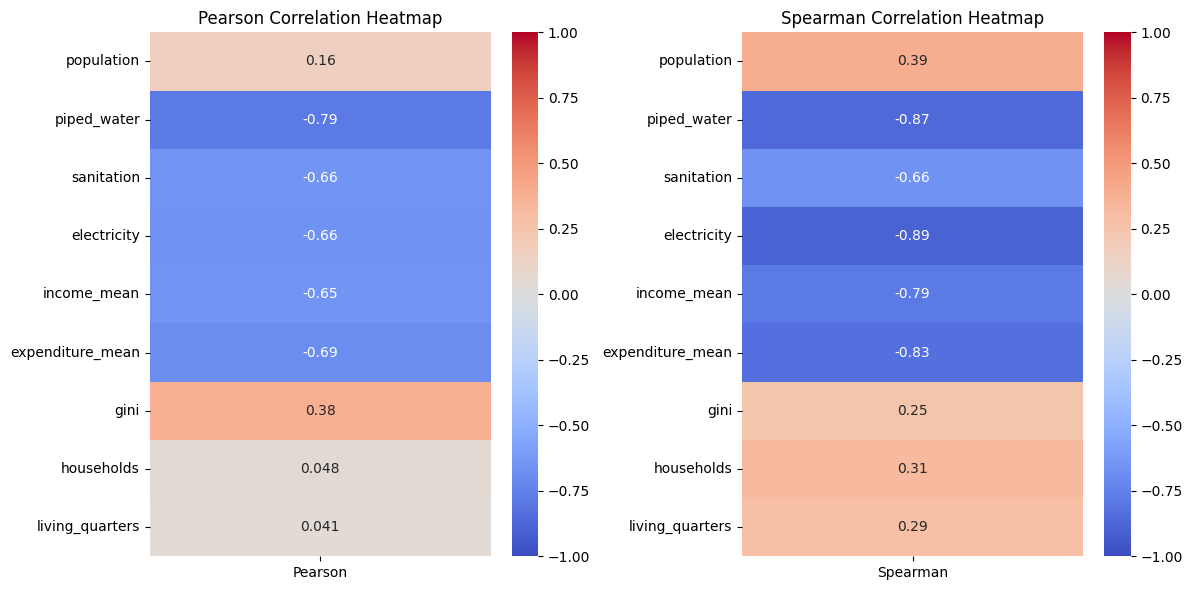

In [16]:
import seaborn as sns

# Function to calculate correlations
def calculate_correlation_matrix(data, predictors, target, method):
    correlations = []
    for predictor in predictors:
        if predictor in data.columns and target in data.columns:
            valid_data = data[[predictor, target]].dropna()
            x = valid_data[predictor]
            y = valid_data[target]
            if method == "pearson":
                corr, _ = pearsonr(x, y)
            elif method == "spearman":
                corr, _ = spearmanr(x, y)
            else:
                raise ValueError("Unsupported correlation method.")
            correlations.append(corr)
        else:
            correlations.append(np.nan)
    return correlations

# Calculate Pearson and Spearman correlations
pearson_correlations = calculate_correlation_matrix(data_3, predictor_variables, target_variable, method="pearson")
spearman_correlations = calculate_correlation_matrix(data_3, predictor_variables, target_variable, method="spearman")


# Calculate Pearson and Spearman correlations
pearson_correlations = calculate_correlation_matrix(data_3, predictor_variables, target_variable, method="pearson")
spearman_correlations = calculate_correlation_matrix(data_3, predictor_variables, target_variable, method="spearman")

# Create a DataFrame for heatmap visualization
correlation_df = pd.DataFrame({
    "Predictor": predictor_variables,
    "Pearson": pearson_correlations,
    "Spearman": spearman_correlations
}).set_index("Predictor")

# Create heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pearson Heatmap
sns.heatmap(correlation_df[["Pearson"]], annot=True, cmap="coolwarm", cbar=True, ax=axes[0], vmin=-1, vmax=1)
axes[0].set_title("Pearson Correlation Heatmap")
axes[0].set_ylabel("")

# Spearman Heatmap
sns.heatmap(correlation_df[["Spearman"]], annot=True, cmap="coolwarm", cbar=True, ax=axes[1], vmin=-1, vmax=1)
axes[1].set_title("Spearman Correlation Heatmap")
axes[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

# **4.1 PEARSON AND SPEARMAN CORRELATION ANALYSIS**

The Pearson correlation matrix revealed that Gini index (0.38), living quarters (0.04), population (0.16), and households (0.05) exhibited weak positive correlations with poverty rate. This suggests that while there is a slight positive association, the strength of these relationships is not significant enough to imply strong predictive power. The weak correlations may be influenced by complex socio-economic factors or regional variations not captured by these variables alone.

Besides that, piped water (-0.79), electricity (-0.66),  sanitation (-0.66), average income (-0.65) and average expenditure (-0.69) has showed strong negative correlations with poverty rate.

Based on the results, this study suggested that improvements in income, expenditure, access to sanitation, piped water, and electricity are strongly associated with a reduction in poverty, highlighting their role as critical aspects of socio-economic well-being.

In contrast, the Spearman correlation matrix indicated weaker positive correlations for Gini index (0.25), living quarters (0.29), population (0.39), and households (0.31), suggesting a modest, non-linear relationship with poverty rate.

However, the negative correlations for average income (-0.79), average expenditure (-0.83), sanitation (-0.66), piped water (-0.87), and electricity (-0.89) were even stronger in this case.

This highlights the strong and steady negative link between these factors and poverty, highlighting the role that greater income levels and resource accessibility play in reducing poverty. The Spearman matrix's larger correlations imply that non-linear linkages may be a superior way to capture the relationships between these variables and poverty, possibly exposing more intricate dynamics that the linear Pearson correlation analysis was unable to see (Bocianowski et al., 2023).

With access to essential services and greater income serving as important markers of reduced poverty, both correlation matrices emphasize the significance of economic and infrastructure elements in combating poverty overall. To properly capture the subtleties of these interactions, additional analysis possibly involving more sophisticated statistical techniques may be necessary, as indicated by the disparities in correlation strengths between the two approaches.

**References:**

Department of Statistics Malaysia. (2022). *Household Income and Expenditure: States.* OpenDOSM. Retrieved January 20, 2025, from https://open.dosm.gov.my/data-catalogue/hies_state

Bocianowski, J., Wrońska-Pilarek, D., Krysztofiak-Kaniewska, A., Matusiak, K., & Wiatrowska, B. (2023). *Comparison of Pearson’s and Spearman’s correlation coefficients values for selected traits of Pinus sylvestris L.*

## **4.2 SIGNIFICANCE OF VARIABLES**
The correlation analysis revealed that p-value of average income (0.0062), average expenditure (0.0028), and access to basic amenities such as sanitation (0.0058), electricity (0.0049), and piped water (0.00028) have p-values below the 0.05 significance level. This indicates that these variables are statistically significant in relation to the poverty rate in Malaysia.

In [17]:
# Display sorted results
print(correlation_results)

           Variable  Pearson_Correlation  Pearson_p_value  \
6              gini             0.377454         0.149499   
0        population             0.160937         0.551555   
7        households             0.047529         0.861243   
8   living_quarters             0.041311         0.879264   
4       income_mean            -0.651954         0.006206   
2        sanitation            -0.655495         0.005840   
3       electricity            -0.664791         0.004960   
5  expenditure_mean            -0.694995         0.002804   
1       piped_water            -0.788710         0.000282   

   Spearman_Correlation  Spearman_p_value  
6              0.247059          0.356275  
0              0.391176          0.134071  
7              0.314706          0.235158  
8              0.288235          0.278984  
4             -0.785294          0.000313  
2             -0.657927          0.005598  
3             -0.890877          0.000004  
5             -0.832353          0.00

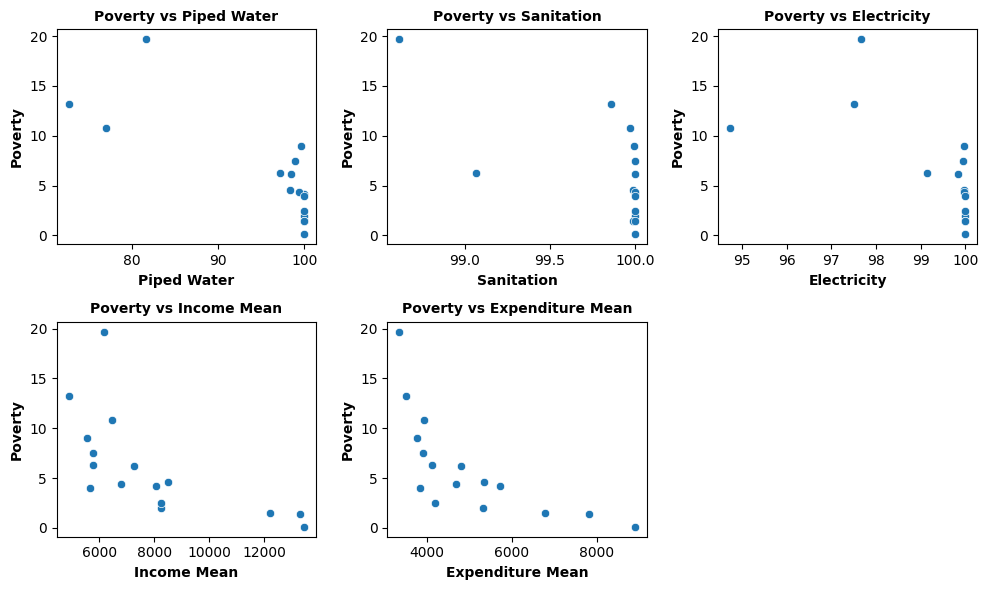

In [18]:
import seaborn as sns
# Define significant variable (sig_var) with the required columns
sig_var = merged_df[[
    'piped_water', 'sanitation', 'electricity', 'income_mean', 'expenditure_mean', 'poverty'
]].copy()

# List of variables to plot
variables = ['piped_water', 'sanitation', 'electricity', 'income_mean', 'expenditure_mean']

# Setting the grid for subplots (2 rows x 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through variables and create scatter plots
for i, var in enumerate(variables):
    sns.scatterplot(data=sig_var, x=var, y='poverty', ax=axes[i])
    axes[i].set_title(f'Poverty vs {var.replace("_", " ").title()}', fontsize=10, fontweight='bold')
    axes[i].set_xlabel(var.replace("_", " ").title(), fontweight='bold')
    axes[i].set_ylabel("Poverty", fontweight='bold')

# Hide any unused subplots
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


Based on the scatter plot shown in the figure above, it can be infered that average income and average expenditure exhibit significant trends, where higher levels of average income or expenditure are associated with lower poverty rates.

This inverse relationship suggests that when individuals’ income or expenditure increases, then they are less likely to fall below the poverty threshold. Higher income enables better access to essential goods and services, improving living standards and reducing the likelihood of poverty (Ministry of Economy Malaysia, 2022).

Similarly, increased expenditure, which often correlates with higher consumption of basic needs and services, further supports the reduction of poverty. These trends highlight the critical role of economic well-being in mitigating poverty, emphasizing that enhancing income and expenditure levels can lead to substantial improvements in socioeconomic conditions.

**References:**

Department of Statistics Malaysia. (2022). *Household Income and Expenditure Survey (HIES) 2022.* Retrieved from https://open.dosm.gov.my/dashboard/household-income-expenditure

Ministry of Economy Malaysia. (2022). *Household Income, Poverty and Household Expenditure.* Retrieved from https://ekonomi.gov.my/en/socio-economic-statistics/household-income-poverty-and-household-expenditure

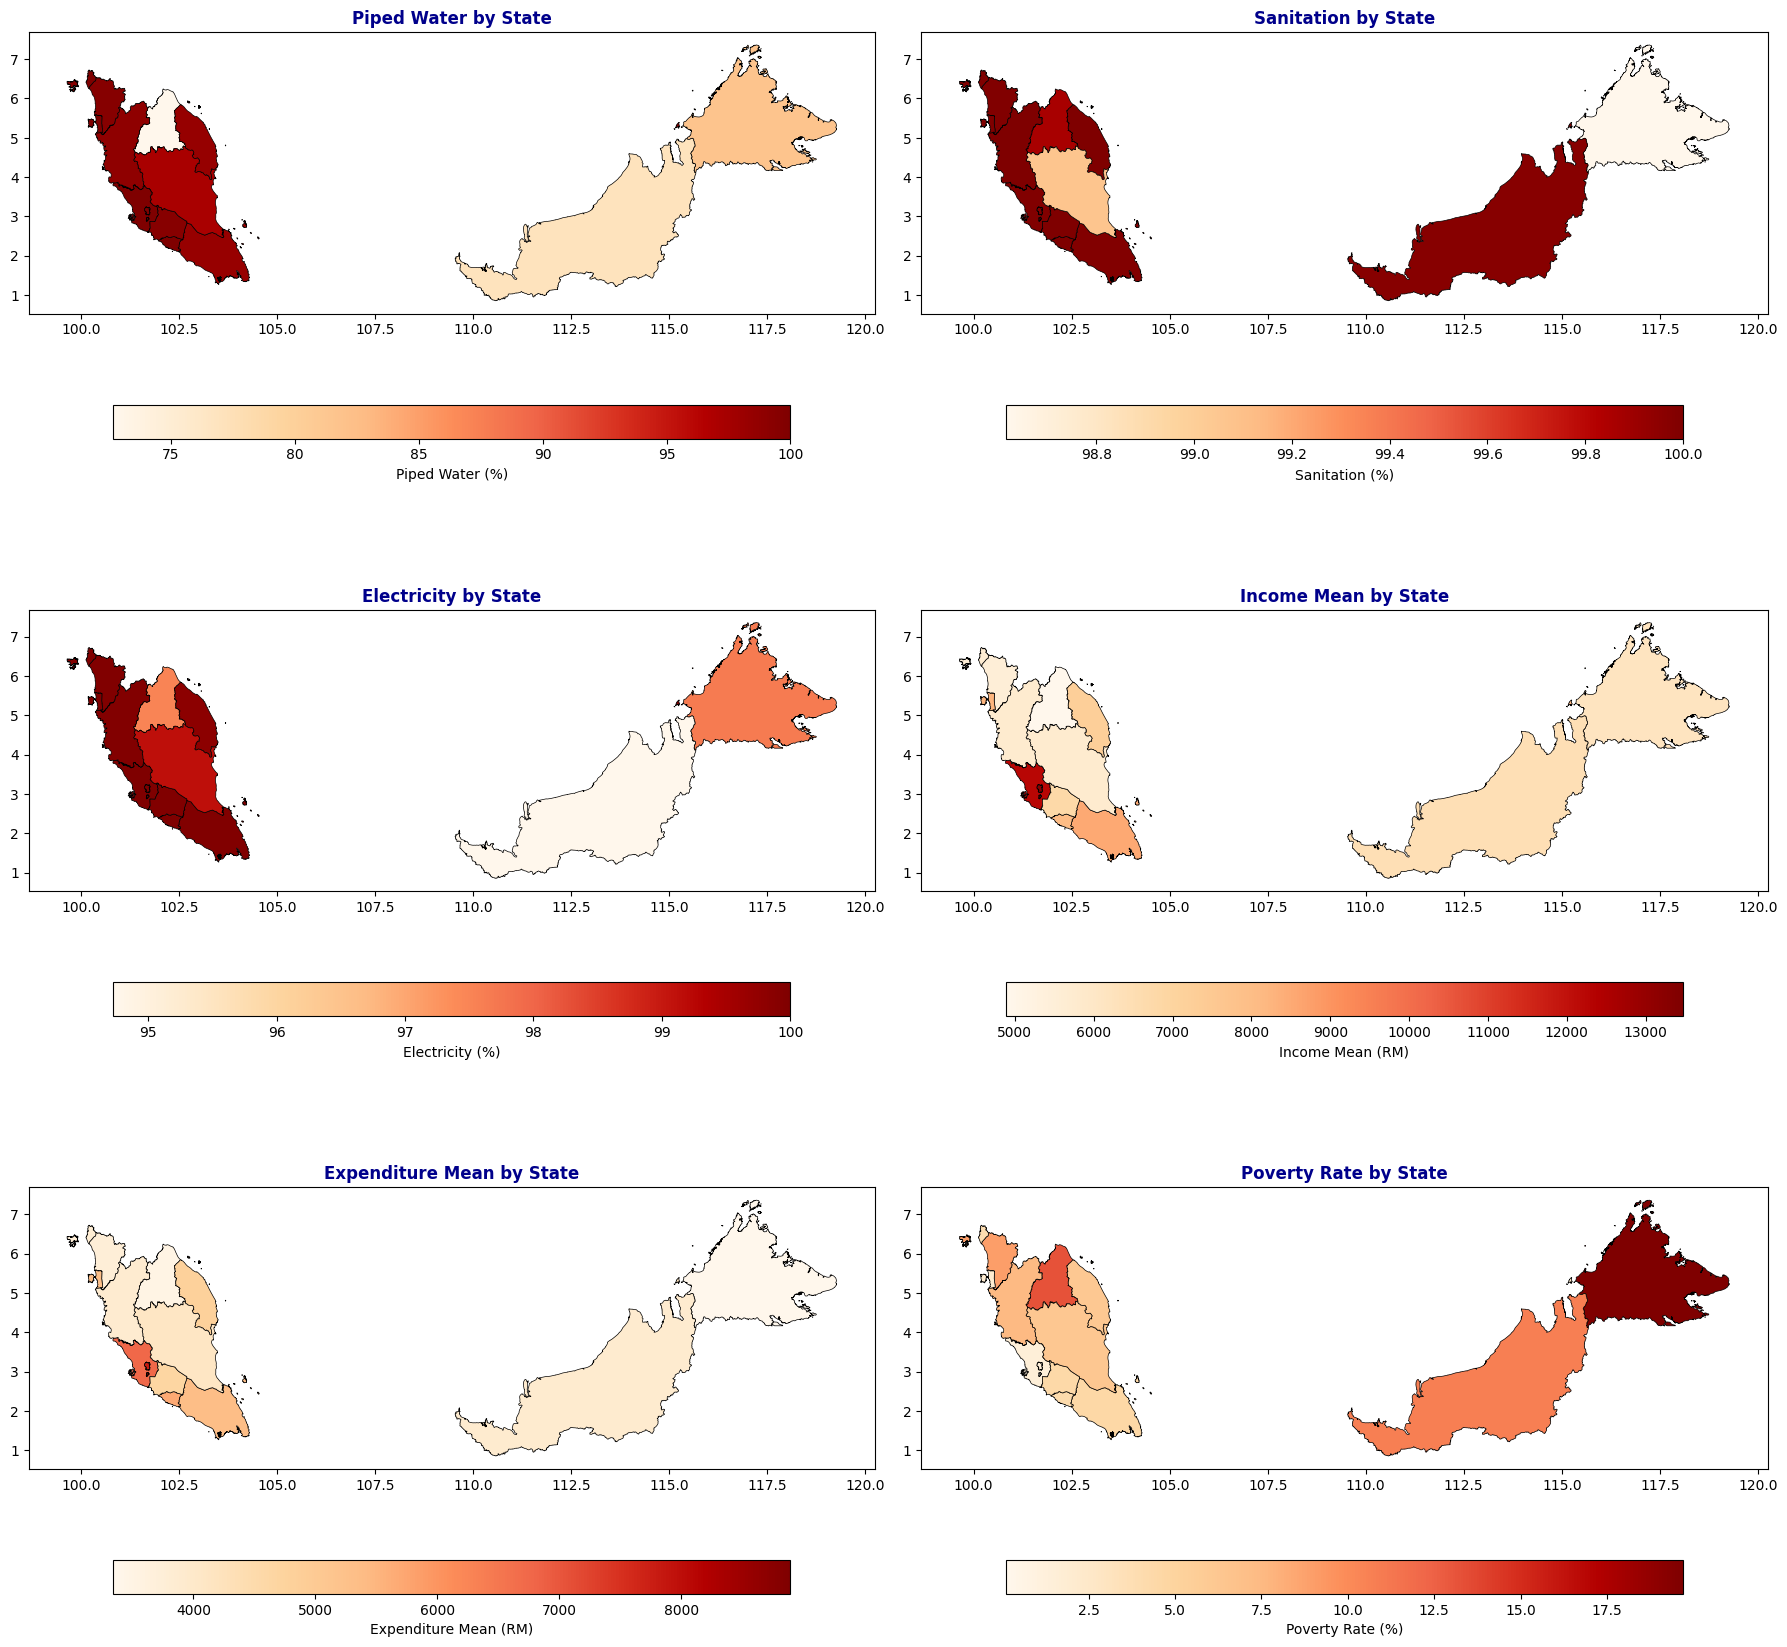

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile with correct file path from manarifz github
shapefile_path = "https://raw.githubusercontent.com/manarifz/MSc-Project-2-Data-Science/main/Shape%20File/malaysia%20state%20v2.shp"
gdf = gpd.read_file(shapefile_path)

# poverty data
df = merged_df[['state', 'piped_water', 'sanitation', 'electricity', 'income_mean', 'expenditure_mean', 'poverty']]

# Merge geospatial data with poverty data
merged_gdf = gdf.merge(df, on='state')

# Set up the plot with subplots for each variable
fig, axes = plt.subplots(3, 2, figsize=(18, 18))  # 3 rows, 2 columns for subplots
axes = axes.flatten()  # Flatten to make it easier to loop through subplots

# List of columns to plot
columns_to_plot = ['piped_water', 'sanitation', 'electricity', 'income_mean', 'expenditure_mean', 'poverty']
titles = ['Piped Water', 'Sanitation', 'Electricity', 'Income Mean', 'Expenditure Mean', 'Poverty Rate']

# Plot each variable in the subplots
for i, col in enumerate(columns_to_plot):
    ax = axes[i]

    # Conditional legend label based on column name
    if col in ['income_mean', 'expenditure_mean']:
        legend_label = f"{titles[i]} (RM)"
    else:
        legend_label = f"{titles[i]} (%)"

    merged_gdf.plot(column=col,
                    cmap='OrRd',
                    ax=ax,
                    legend=True,
                    legend_kwds={'label': legend_label, 'orientation': 'horizontal', 'shrink': 0.8},
                    edgecolor='black', linewidth=0.5)
    ax.set_title(f'{titles[i]} by State', fontsize=12, fontweight='bold', color='darkblue')
    ax.axis('on')  # Turn off the axis for a cleaner map

# Adjust layout
plt.tight_layout()
plt.show()

## **6.0 SPATIAL ANALYSIS**

Mapping the poverty rate, expenditure, average income, sanitation, piped water, and electricity access by state in Malaysia was conducted to provide a clearer demographic visualization of the regional disparities across the country.

This spatial analysis allows for a more better understanding of how these key socioeconomic factors are distributed geographically, helping to identify areas where improvements are needed most (Henninger, 1998).

By visualizing these variables at the state level, we can better assess the effectiveness of existing policies and initiatives aimed at reducing poverty and improving living conditions (Thongdara et al., 2012; Luo et al., 2022).

The mapping also serves as a tool for policymakers, enabling targeted interventions that address specific regional challenges related to income, infrastructure, and access to basic services.

**References:**

Henninger, N. (1998). *Mapping and geographic analysis of human welfare and poverty: review and assessment.* Washington, DC: World Resources Institute.

Thongdara, R., Samarakoon, L., Shrestha, R. P., & Ranamukhaarachchi, S. L. (2012). *Using GIS and spatial statistics to target poverty and improve poverty alleviation programs: A case study in northeast Thailand.* Applied Spatial Analysis and Policy, 5, 157-182.

Luo, E., Kuffer, M., & Wang, J. (2022). *Urban poverty maps-From characterising deprivation using geo-spatial data to capturing deprivation from space*. Sustainable Cities and Society, 84, 104033.

## **7.0 CONCLUSION**

This analysis has provided valuable insights into the relationship between poverty and variables such as population, income, expenditure, basic amenities, and agricultural activity. The main outcomes from the descriptive statistics and correlation analysis highlight the significant role of economic well-being and access to essential services in reducing poverty rates across states.

The Pearson and Spearman correlation matrices consistently showed strong negative correlations between poverty and variables such as average income, average expenditure, and access to basic amenities (sanitation, piped water, and electricity), with p-values below the 0.05 significance
level. These results indicate that these factors are statistically significant predictors of poverty. On the other hand, variables like Gini index, living quarters, population, and households demonstrated weak or
moderate positive correlations with poverty, suggesting limited direct influence on poverty rates.

Therefore, this study has come to conclusion that we reject the null hypothesis (H0) which stated that there is no relationship between poverty and other studied variable since that there is enough evidence to support the alternative hypothesis (H1) which stated that there is a relationship between poverty and factors including income, expenditure and access to basic amenities.

For future recommendations, policymakers should focus on targeted interventions especially in states with high poverty rates such as Kelantan and Sabah by prioritizing investments in income-generating activities, equitable resource distribution and access to essential services. Spatial analysis further reinforces the need for region-specific strategies to ensure inclusive and sustainable development across Malaysia.